In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('C:/Users/Rishav.Sinha/PycharmProjects/pythoProject/online_payment_fraud.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [5]:
df.shape


(6362620, 11)

In [6]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [7]:
df.nunique()

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [8]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

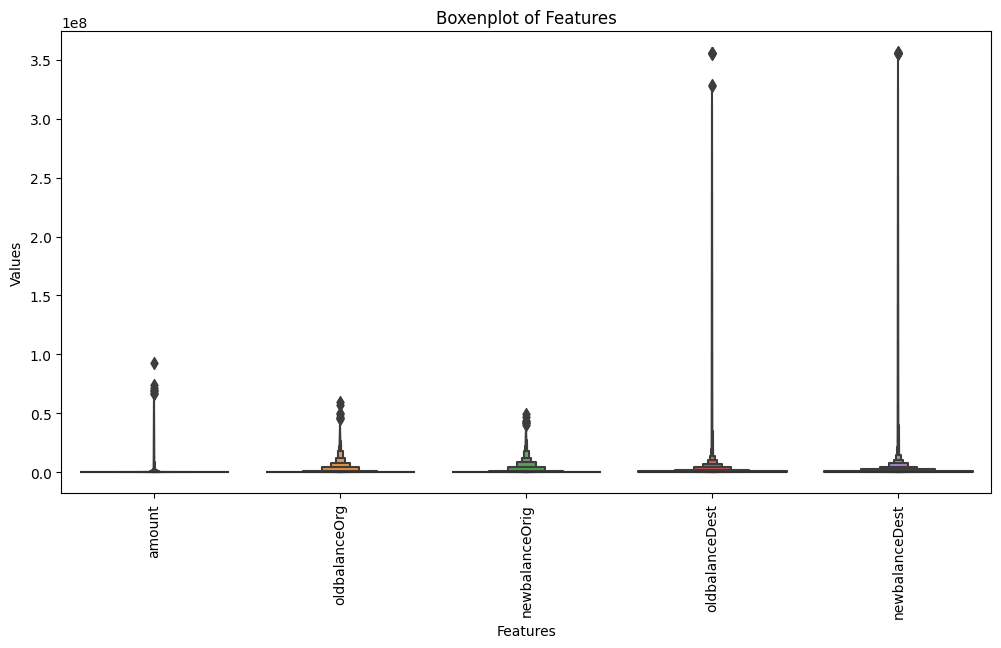

In [9]:
df_2 = df.drop(['step', 'isFraud', 'isFlaggedFraud'], axis=1)

plt.figure(figsize=(12, 6))
sns.boxenplot(data=df_2)
plt.xticks(rotation=90)
plt.title('Boxenplot of Features')
plt.xlabel('Features')
plt.ylabel('Values')
plt.show()



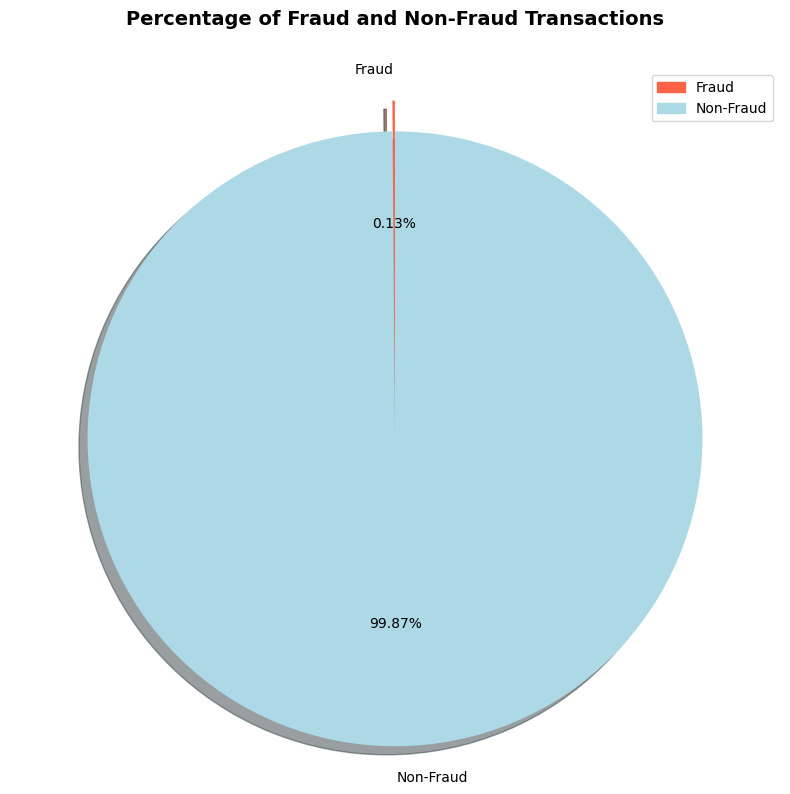

0    6354407
1       8213
Name: isFraud, dtype: int64


In [10]:
# Count the number of fraud and non-fraud transactions
fraud_count = df[df['isFraud'] == 1].shape[0]
non_fraud_count = df[df['isFraud'] == 0].shape[0]

# Calculate the percentages
fraud_percentage = fraud_count / len(df) * 100
non_fraud_percentage = non_fraud_count / len(df) * 100

# Create a pie chart
labels = ['Fraud', 'Non-Fraud']
sizes = [fraud_percentage, non_fraud_percentage]
colors = ['#FF6347', '#ADD8E6']
explode = [0.1, 0]

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%.2f%%', startangle=90, shadow=True)

# Customize the chart
plt.title('Percentage of Fraud and Non-Fraud Transactions', fontsize=14, fontweight='bold', y=1.05)
plt.axis('equal')

# Add a legend with custom colors
legend_colors = [plt.Circle((0, 0), 0.7, color=color) for color in colors]
plt.legend(legend_colors, labels, loc='upper right', fontsize=10)

# Display the chart
plt.tight_layout()
plt.show()
print(df.isFraud.value_counts())

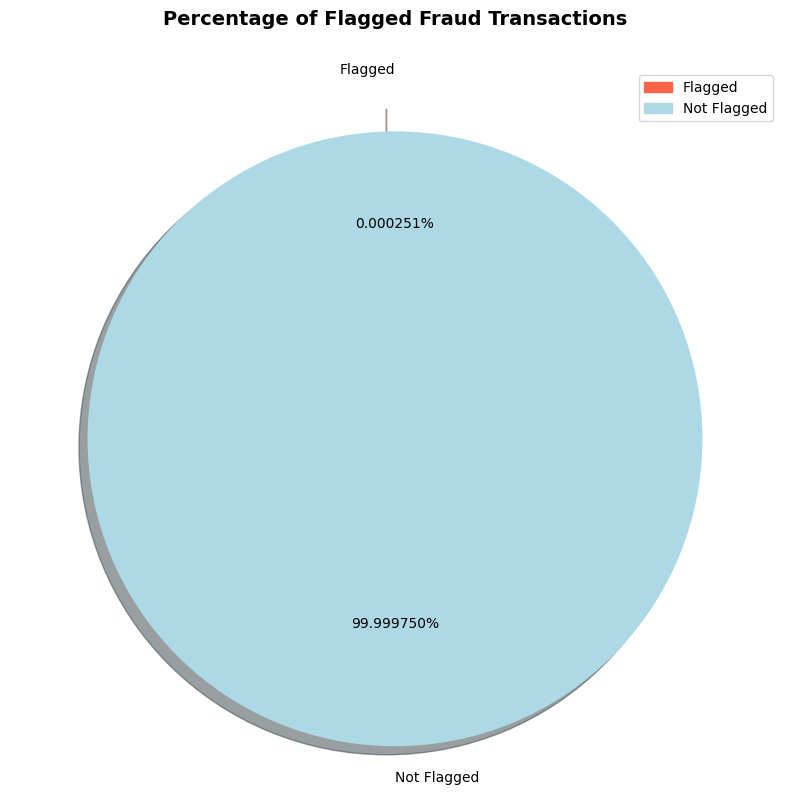

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64


In [11]:
# Count the number of fraud and non-fraud transactions
flagged_count = df[df['isFlaggedFraud'] == 1].shape[0]
non_flagged_count = df[df['isFlaggedFraud'] == 0].shape[0]

# Calculate the percentages
flagged_percentage = flagged_count / len(df) * 100
non_flagged_percentage = non_flagged_count / len(df) * 100

# Create a pie chart
labels = ['Flagged', 'Not Flagged']
sizes = [flagged_percentage, non_flagged_percentage]
colors = ['#FF6347', '#ADD8E6']
explode = [0.1, 0]

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%.6f%%', startangle=90, shadow=True)

# Customize the chart
plt.title('Percentage of Flagged Fraud Transactions', fontsize=14, fontweight='bold', y=1.05)
plt.axis('equal')

# Add a legend with custom colors
legend_colors = [plt.Circle((0, 0), 0.7, color=color) for color in colors]
plt.legend(legend_colors, labels, loc='upper right', fontsize=10)

# Display the chart
plt.tight_layout()
plt.show()
print(df.isFlaggedFraud.value_counts())



CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64


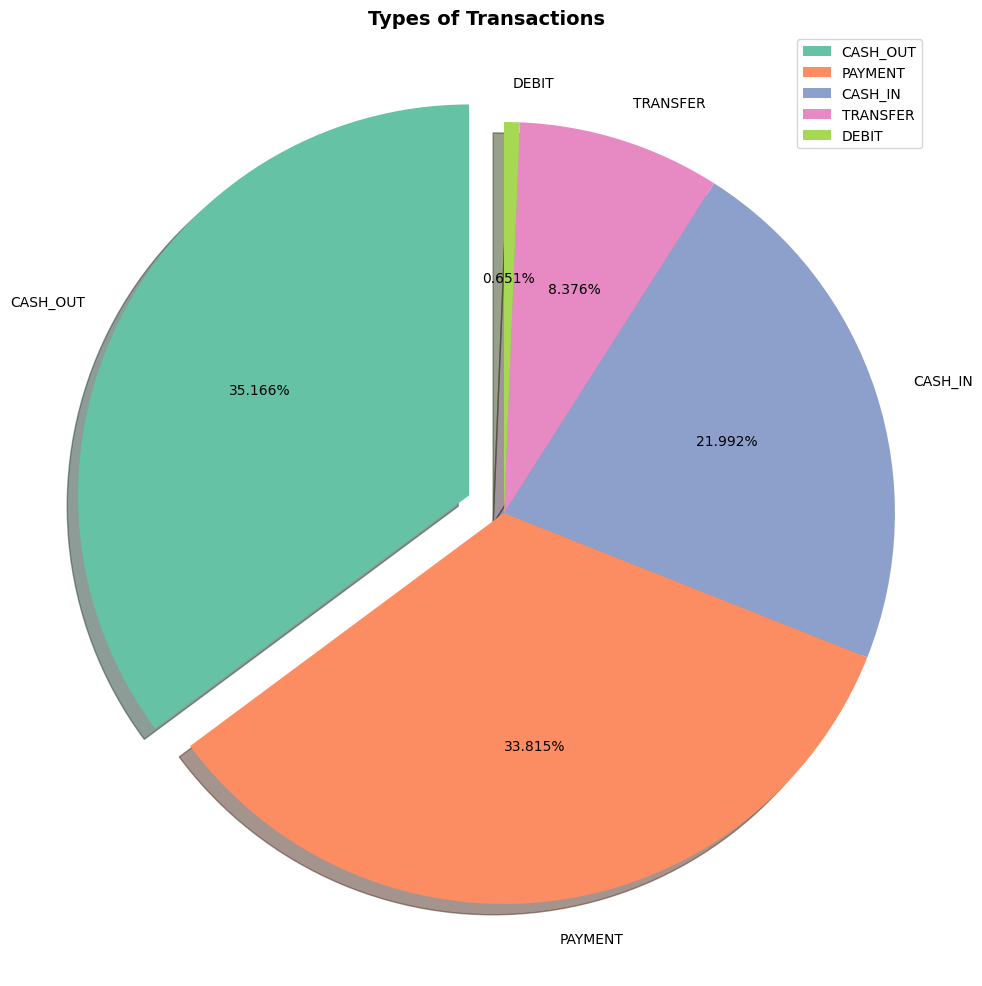

In [12]:
# Print value counts of 'type' column
print(df['type'].value_counts())

# Create a pie chart
plt.figure(figsize=(10, 10))
colors = sns.color_palette("Set2")
explode = (0.1, 0, 0, 0, 0)  # Explode the first slice (CASH_OUT) for emphasis
plt.pie(df['type'].value_counts(), labels=df['type'].value_counts().index, colors=colors, explode=explode,
        autopct='%.3f%%', startangle=90, shadow=True)

# Add a legend and title
plt.legend(loc="upper right")
plt.title('Types of Transactions', fontsize=14, fontweight='bold')

# Ensure the pie chart is circular
plt.axis('equal')

# Display the chart
plt.tight_layout()
plt.show()


isFraud           0       1
type                       
CASH_IN   1399284.0     NaN
CASH_OUT  2233384.0  4116.0
DEBIT       41432.0     NaN
PAYMENT   2151495.0     NaN
TRANSFER   528812.0  4097.0
isFlaggedFraud          0     1
type                           
CASH_IN         1399284.0   NaN
CASH_OUT        2237500.0   NaN
DEBIT             41432.0   NaN
PAYMENT         2151495.0   NaN
TRANSFER         532893.0  16.0


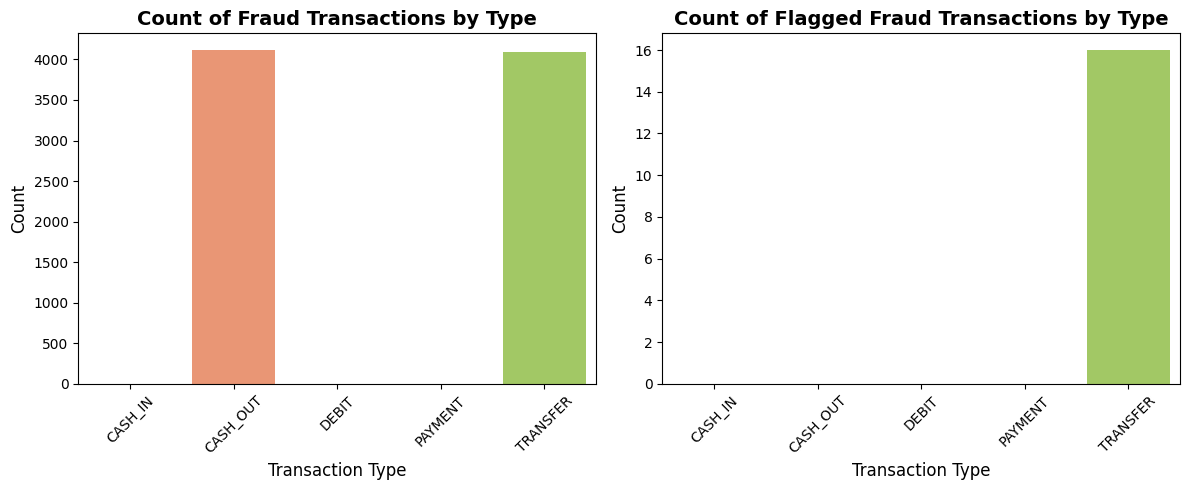

In [13]:
# Group the dataframe by transaction type and isFraud column, count the number of occurrences
fraud_by_type = df.groupby(['type', 'isFraud'])['isFraud'].count().unstack()

# Group the dataframe by transaction type and isFlaggedFraud column, count the number of occurrences
flagged_by_type = df.groupby(['type', 'isFlaggedFraud'])['isFlaggedFraud'].count().unstack()

# Print the counts
print(fraud_by_type)
print(flagged_by_type)

# Plot the charts
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot for fraud transactions
sns.barplot(x=fraud_by_type.index, y=fraud_by_type[1], ax=axs[0], palette='Set2')
axs[0].set_title('Count of Fraud Transactions by Type', fontsize=14, fontweight='bold')
axs[0].set_xlabel('Transaction Type', fontsize=12)
axs[0].set_ylabel('Count', fontsize=12)
axs[0].tick_params(axis='x', rotation=45)

# Bar plot for flagged fraud transactions
sns.barplot(x=flagged_by_type.index, y=flagged_by_type[1], ax=axs[1], palette='Set2')
axs[1].set_title('Count of Flagged Fraud Transactions by Type', fontsize=14, fontweight='bold')
axs[1].set_xlabel('Transaction Type', fontsize=12)
axs[1].set_ylabel('Count', fontsize=12)
axs[1].tick_params(axis='x', rotation=45)

# Adjust the layout and spacing
plt.tight_layout()

# Show the plots
plt.show()


In [14]:
step = df['step'].value_counts()

step

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

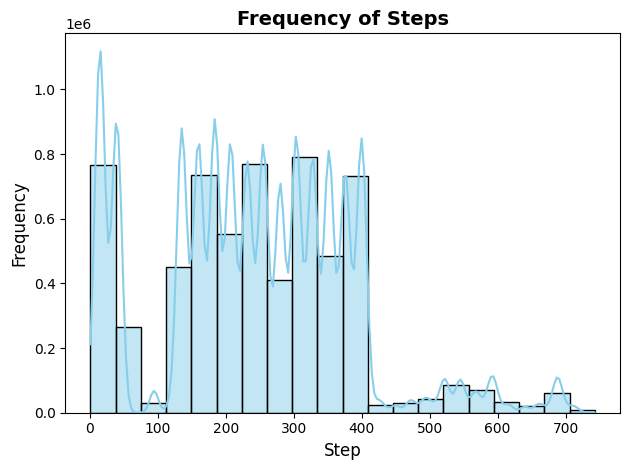

In [15]:
sns.histplot(df['step'], bins=20, kde=True, color='skyblue')

plt.title('Frequency of Steps', fontsize=14, fontweight='bold')
plt.xlabel('Step', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()

In [16]:
# finding out the minimum and maximum transaction from Transfer and cash out transaction mode when it is set to be Fraud

print("Transfer Transaction")
print("Minimum Transaction :", df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')].amount.min())
print("Maximum Transaction :", df.loc[(df.isFraud == 1) & (df.type == 'TRANSFER')].amount.max())

print("\nCASH_OUT Transaction")
print("Minimum Transaction :", df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')].amount.min())
print("Maximum Transaction :", df.loc[(df.isFraud == 1) & (df.type == 'CASH_OUT')].amount.max())

Transfer Transaction
Minimum Transaction : 63.8
Maximum Transaction : 10000000.0

CASH_OUT Transaction
Minimum Transaction : 0.0
Maximum Transaction : 10000000.0


In [17]:
df[df['isFlaggedFraud'] == 1].head(16)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2736446,212,TRANSFER,4953893.08,C728984460,4953893.08,4953893.08,C639921569,0.0,0.0,1,1
3247297,250,TRANSFER,1343002.08,C1100582606,1343002.08,1343002.08,C1147517658,0.0,0.0,1,1
3760288,279,TRANSFER,536624.41,C1035541766,536624.41,536624.41,C1100697970,0.0,0.0,1,1
5563713,387,TRANSFER,4892193.09,C908544136,4892193.09,4892193.09,C891140444,0.0,0.0,1,1
5996407,425,TRANSFER,10000000.00,C689608084,19585040.37,19585040.37,C1392803603,0.0,0.0,1,1
5996409,425,TRANSFER,9585040.37,C452586515,19585040.37,19585040.37,C1109166882,0.0,0.0,1,1
6168499,554,TRANSFER,3576297.10,C193696150,3576297.10,3576297.10,C484597480,0.0,0.0,1,1
6205439,586,TRANSFER,353874.22,C1684585475,353874.22,353874.22,C1770418982,0.0,0.0,1,1
6266413,617,TRANSFER,2542664.27,C786455622,2542664.27,2542664.27,C661958277,0.0,0.0,1,1
6281482,646,TRANSFER,10000000.00,C19004745,10399045.08,10399045.08,C1806199534,0.0,0.0,1,1


In [18]:

# independent dataset

X = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]

X = X.drop(['nameDest','nameOrig'], axis = 1) # dropping string values


#label encoding 
X['type'].replace('TRANSFER', 0, inplace = True)
X['type'].replace('CASH_OUT', 1, inplace = True)

#As all the flagged fraud transactions were indeed fraud we are dropping isFlaggedFraud column
X = X.drop(['isFlaggedFraud'],axis=1)

#dependent dataset
Y = X['isFraud']

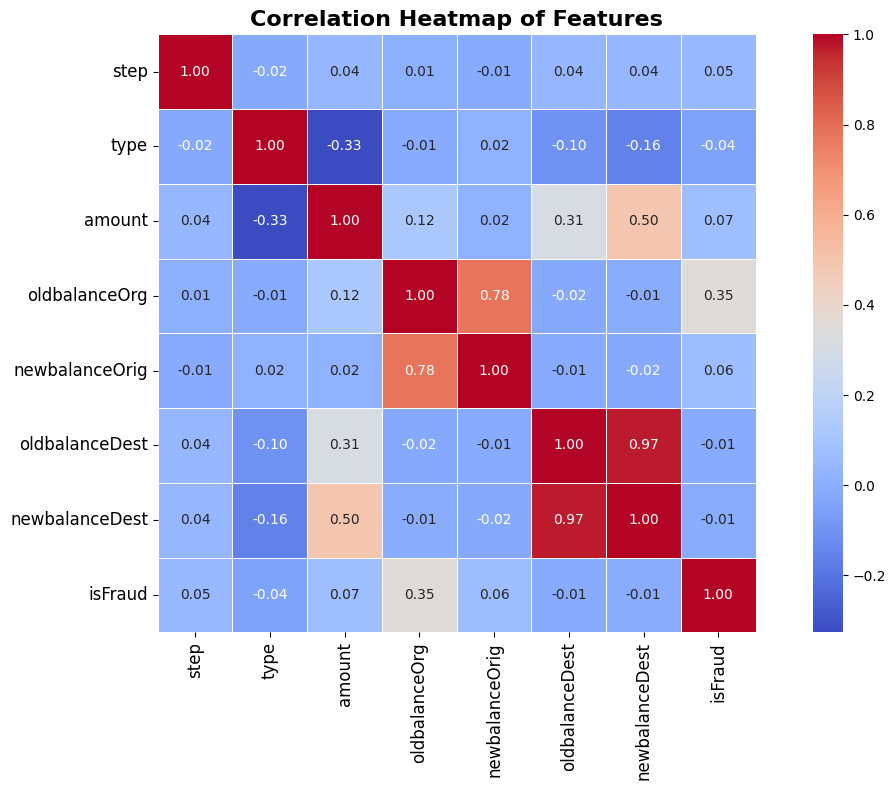

In [19]:
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, fmt=".2f", linewidths=0.5, cmap='coolwarm', square=True)

plt.title('Correlation Heatmap of Features', fontsize=16, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


In [20]:
# removing the dependent value
X = X.drop(['isFraud'], axis = 1)

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 

In [22]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)#split data into train and test

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)

RFC_pred = RFC.predict(x_test)

print(classification_report(y_test, RFC_pred))
print()
print("Accuracy score of Random Forest Classifier is", accuracy_score(y_test, RFC_pred)*100,'%')
print("Precion score of Random Forest Classifier is",precision_score(y_test, RFC_pred)*100,'%')
print("Recall score of Random Forest Classifier is",recall_score(y_test, RFC_pred)*100,'%')
print("F1 score of Random Forest Classifier is",f1_score(y_test, RFC_pred)*100,'%')

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552446
           1       0.98      0.78      0.87      1636

    accuracy                           1.00    554082
   macro avg       0.99      0.89      0.93    554082
weighted avg       1.00      1.00      1.00    554082


Accuracy score of Random Forest Classifier is 99.92997426373714 %
Precion score of Random Forest Classifier is 98.29721362229103 %
Recall score of Random Forest Classifier is 77.62836185819071 %
F1 score of Random Forest Classifier is 86.74863387978142 %


In [24]:
cm_rfc = confusion_matrix(y_test, RFC_pred)

print(cm_rfc)

[[552424     22]
 [   366   1270]]
